In [ ]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [ ]:
credits= pd.read_csv('dataset/credits.csv')
movies= pd.read_csv('dataset/movies.csv')    # MovieLens data

In [ ]:
credits.head(5)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
movies.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
credits.columns=['id','Title','cast','crew']
movies=movies.merge(credits,on='id')         # Merging the 2 tables into one

In [ ]:
movies.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,Title,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [ ]:
len(movies)

4803

In [ ]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'Title', 'cast', 'crew'],
      dtype='object')

<Axes: >

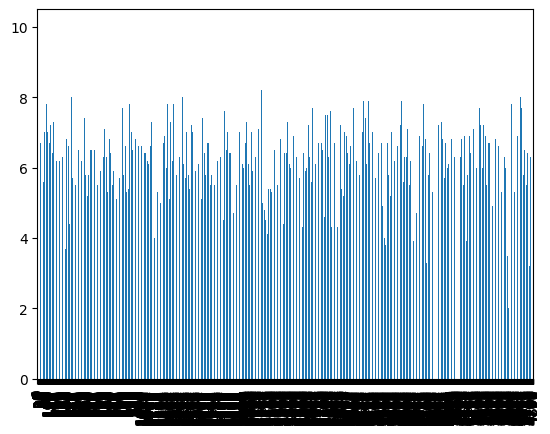

In [ ]:
movies['vote_average'].plot.bar()   # Bar Graph for ratings of movies

**Popularity** **Based** **Model**

In [ ]:
movies.sort_values(by=['popularity'],ascending=False).head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,Title,cast,crew
546,74000000,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 16, ""...",http://www.minionsmovie.com/,211672,"[{""id"": 3487, ""name"": ""assistant""}, {""id"": 179...",en,Minions,"Minions Stuart, Kevin and Bob are recruited by...",875.581305,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",...,91.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Before Gru, they had a history of bad bosses",Minions,6.4,4571,Minions,"[{""cast_id"": 22, ""character"": ""Scarlet Overkil...","[{""credit_id"": ""5431b2b10e0a2656e20026c7"", ""de..."
95,165000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...",http://www.interstellarmovie.net/,157336,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Interstellar,Interstellar chronicles the adventures of a gr...,724.247784,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Mankind was born on Earth. It was never meant ...,Interstellar,8.1,10867,Interstellar,"[{""cast_id"": 9, ""character"": ""Joseph Cooper"", ...","[{""credit_id"": ""52fe4bbf9251416c910e4801"", ""de..."
788,58000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.foxmovies.com/movies/deadpool,293660,"[{""id"": 2095, ""name"": ""anti hero""}, {""id"": 307...",en,Deadpool,Deadpool tells the origin story of former Spec...,514.569956,"[{""name"": ""Twentieth Century Fox Film Corporat...",...,108.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Witness the beginning of a happy ending,Deadpool,7.4,10995,Deadpool,"[{""cast_id"": 99, ""character"": ""Wade Wilson / D...","[{""credit_id"": ""56c986b2925141172f0068b6"", ""de..."


In [ ]:
def popularity_recommender(category):
    mask = movies.genres.apply(lambda x: category in x) # Returns True if category is present in a specific row's genres column
    category_movie = movies[mask]                       # Selects Rows of movies which have category in genres
    category_movie = category_movie.sort_values(by='popularity', ascending=False)
    return category_movie

In [ ]:
popularity_recommender('Adventure')[['id','title', 'popularity','release_date','budget']].head(5)

,id,title,popularity,release_date,budget
546,211672,Minions,875.581305,2015-06-17,74000000
95,157336,Interstellar,724.247784,2014-11-05,165000000
788,293660,Deadpool,514.569956,2016-02-09,58000000
94,118340,Guardians of the Galaxy,481.098624,2014-07-30,170000000
127,76341,Mad Max: Fury Road,434.278564,2015-05-13,150000000


In [ ]:
popularity_recommender('Comedy')[['id','title', 'popularity','release_date']].head(5)

,id,title,popularity,release_date
546,211672,Minions,875.581305,2015-06-17
788,293660,Deadpool,514.569956,2016-02-09
88,177572,Big Hero 6,203.734590,2014-10-24
238,98566,Teenage Mutant Ninja Turtles,143.350376,2014-08-07
362,257344,Pixels,140.849495,2015-07-16


In [ ]:
popularity_recommender('Romance')[['id','title', 'popularity','release_date']].head(5)

,id,title,popularity,release_date
809,13,Forrest Gump,138.133331,1994-07-06
1337,8966,Twilight,127.084938,2008-11-20
81,102651,Maleficent,110.620647,2014-05-28
612,24021,The Twilight Saga: Eclipse,107.069763,2010-06-23
326,150689,Cinderella,101.187052,2015-03-12


In [ ]:
popularity_recommender('Thriller')[['id','title', 'popularity','release_date']].head(5)

,id,title,popularity,release_date
127,76341,Mad Max: Fury Road,434.278564,2015-05-13
28,135397,Jurassic World,418.708552,2015-06-09
82,119450,Dawn of the Planet of the Apes,243.791743,2014-06-26
200,131631,The Hunger Games: Mockingjay - Part 1,206.227151,2014-11-18
108,87101,Terminator Genisys,202.042635,2015-06-23


**Popularity Recommender based on Weighted Rating based on IMDB Rating System:**

Below is the rating system used by IMDB. This is very important method since all the movies that are rated 5 out of 5 are not the same. One might have got millions of ratings whereas one might be more limited in terms of number of votes. So this rating gives more importance to the movies that are rated more.It used a weighted rating for removing this problem:

**Weighted Rating=(v/(v+m))R+(m/(v+m))C**

Where:

R = average rating for the movie.

v = number of votes for the movie.

m = minimum votes required to be listed in the Top 10.

C = average rating of movies in the dataset.¶

In [ ]:
avg= movies['vote_average'].mean()
avg

np.float64(6.092171559442016)

In [ ]:
m= movies['vote_count'].quantile(0.9)
m

np.float64(1838.4000000000015)

In [ ]:
def weighted_movie(A,m=m,C=avg):
    v=A['vote_count']
    R=A['vote_average']
    #calculation based on IMDB formula

    return (v/(v+m)*R) + (m/(m+v)*avg)

In [ ]:
ratings=movies # Variable to store weighted_rating

In [ ]:
#define a new feature 'weighted_rating' and calculate its value with weighted_movie()
ratings['weighted_rating']= movies.apply(weighted_movie,axis=1)

In [ ]:
ratings= ratings.sort_values('weighted_rating', ascending=False)

#Printing the top 10 movies
ratings[['title', 'vote_count', 'vote_average', 'weighted_rating','popularity']].head(10)

,title,vote_count,vote_average,weighted_rating,popularity
1881,The Shawshank Redemption,8205,8.5,8.059258,136.747729
662,Fight Club,9413,8.3,7.939256,146.757391
65,The Dark Knight,12002,8.2,7.920020,187.322927
3232,Pulp Fiction,8428,8.3,7.904645,121.463076
96,Inception,13752,8.1,7.863239,167.583710
3337,The Godfather,5893,8.4,7.851236,143.659698
95,Interstellar,10867,8.1,7.809479,724.247784
809,Forrest Gump,7927,8.2,7.803188,138.133331
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243,123.630332
1990,The Empire Strikes Back,5879,8.2,7.697884,78.517830
